Shape of dataset: (150, 4)
Cluster Centers:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


c:\Users\nk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


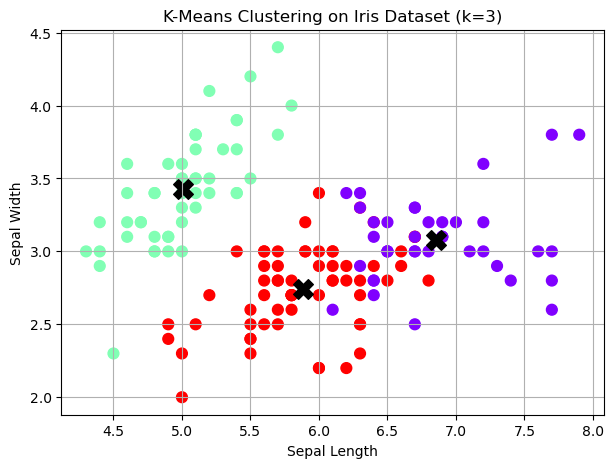

c:\Users\nk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

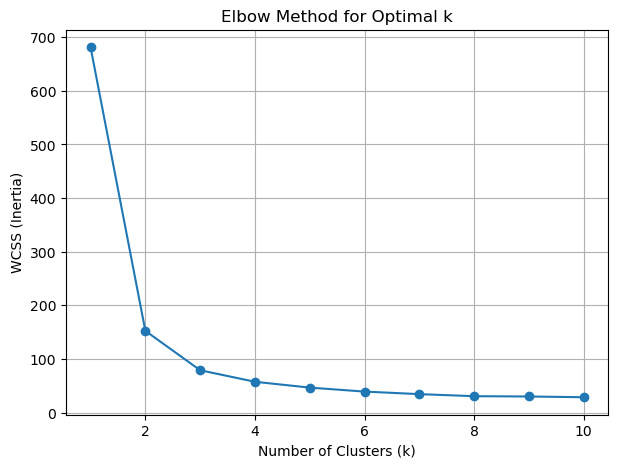

0.5511916046195919


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# -----------------------
# Step 1: Load Dataset
# -----------------------
iris = load_iris()
X = iris.data  # features (sepal length, sepal width, petal length, petal width)

print("Shape of dataset:", X.shape)  # (150 samples, 4 features)

# -----------------------
# Step 2: Apply K-Means
# -----------------------
kmeans = KMeans(n_clusters=3, random_state=42)  # we know iris has 3 species
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster Centers:\n", centroids)

# -----------------------
# Step 3: Visualization (using only 2 features for plotting)
# -----------------------
plt.figure(figsize=(7,5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=60)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("K-Means Clustering on Iris Dataset (k=3)")
plt.grid(True)
plt.show()

# -----------------------
# Step 4: Elbow Method
# -----------------------
wcss = []  # Within-Cluster Sum of Squares
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()
from sklearn.metrics import silhouette_score
score = silhouette_score(X, labels)
print(score)


   Age  Income  SpendingScore
0   19      15             39
1   21      16             81
2   20      17              6
3   23      18             77
4   31      25             40

Cluster Centers (scaled):
 [[ 0.74181545  0.76312087  0.02616534]
 [-1.1251143  -1.15853943  1.26617473]
 [-1.10033204 -1.13082318 -1.34467074]]

Cluster Labels:
 Cluster
0    9
2    3
1    3
Name: count, dtype: int64


c:\Users\nk\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


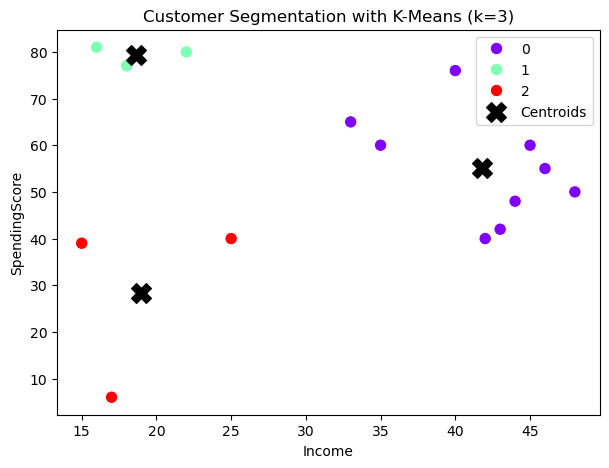


Cluster 0 Summary:
             Age     Income  SpendingScore  Cluster
count   9.000000   9.000000       9.000000      9.0
mean   48.111111  41.777778      55.111111      0.0
std     6.863753   4.994441      11.504830      0.0
min    38.000000  33.000000      40.000000      0.0
25%    45.000000  40.000000      48.000000      0.0
50%    48.000000  43.000000      55.000000      0.0
75%    52.000000  45.000000      60.000000      0.0
max    60.000000  48.000000      76.000000      0.0

Cluster 1 Summary:
        Age     Income  SpendingScore  Cluster
count   3.0   3.000000       3.000000      3.0
mean   23.0  18.666667      79.333333      1.0
std     2.0   3.055050       2.081666      0.0
min    21.0  16.000000      77.000000      1.0
25%    22.0  17.000000      78.500000      1.0
50%    23.0  18.000000      80.000000      1.0
75%    24.0  20.000000      80.500000      1.0
max    25.0  22.000000      81.000000      1.0

Cluster 2 Summary:
             Age     Income  SpendingScore  Clust

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# -----------------------
# Step 1: Create Dataset
# -----------------------
# Example customer data: Age, Annual Income (k$), Spending Score (1–100)
data = {
    'Age': [19, 21, 20, 23, 31, 45, 46, 50, 54, 60, 25, 40, 38, 48, 52],
    'Income': [15, 16, 17, 18, 25, 40, 42, 43, 45, 48, 22, 35, 33, 44, 46],
    'SpendingScore': [39, 81, 6, 77, 40, 76, 40, 42, 60, 50, 80, 60, 65, 48, 55]
}

df = pd.DataFrame(data)
print(df.head())

# -----------------------
# Step 2: Preprocess
# -----------------------
scaler = StandardScaler()
X = scaler.fit_transform(df[['Age', 'Income', 'SpendingScore']])

# -----------------------
# Step 3: Apply K-Means
# -----------------------
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print("\nCluster Centers (scaled):\n", kmeans.cluster_centers_)
print("\nCluster Labels:\n", df['Cluster'].value_counts())

# -----------------------
# Step 4: Visualize
# -----------------------
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Income', y='SpendingScore', hue='Cluster', palette='rainbow', s=80)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:,1],  # Income axis
    scaler.inverse_transform(kmeans.cluster_centers_)[:,2],  # SpendingScore axis
    marker='X', s=200, c='black', label='Centroids'
)
plt.title("Customer Segmentation with K-Means (k=3)")
plt.legend()
plt.show()

# -----------------------
# Step 5: Interpret Clusters
# -----------------------
for i in range(3):
    cluster_data = df[df['Cluster'] == i]
    print(f"\nCluster {i} Summary:")
    print(cluster_data.describe())
labels=df['Cluster']
from sklearn.metrics import silhouette_score
score1 = silhouette_score(X, labels)
print(score1)


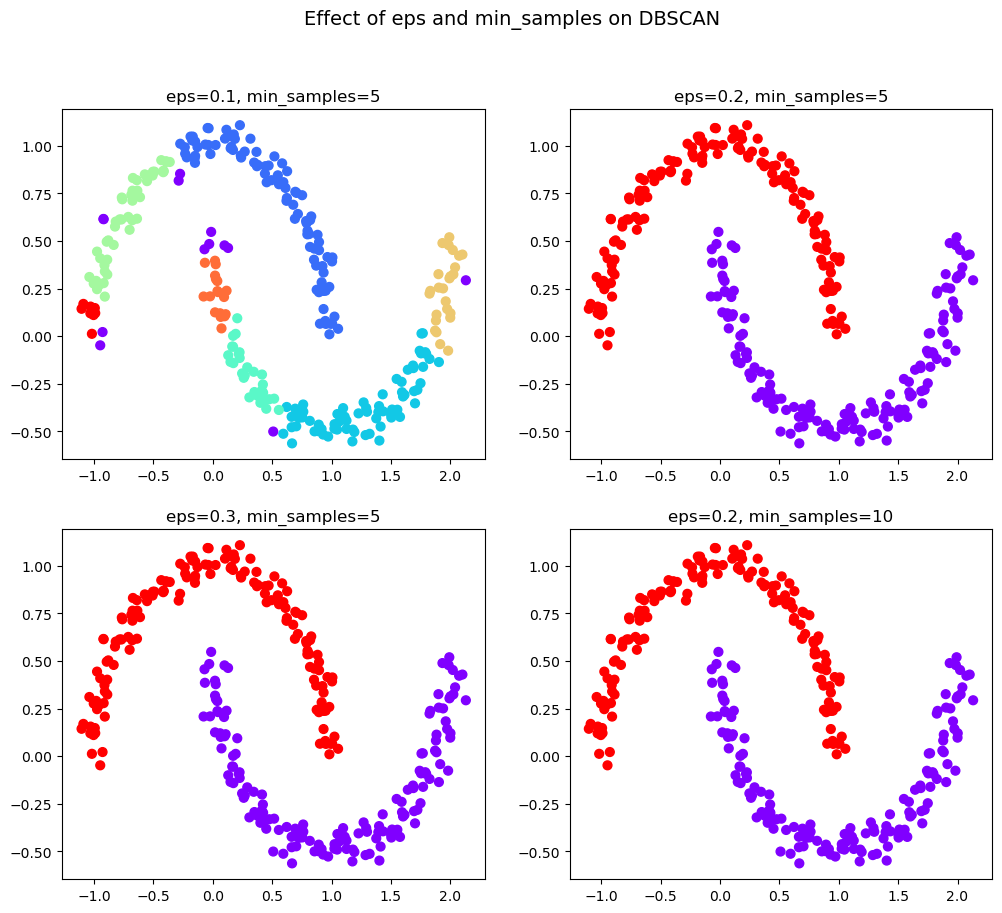

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate dataset
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Try different DBSCAN settings
settings = [
    {"eps": 0.1, "min_samples": 5},
    {"eps": 0.2, "min_samples": 5},
    {"eps": 0.3, "min_samples": 5},
    {"eps": 0.2, "min_samples": 10},
]

plt.figure(figsize=(12, 10))

for i, params in enumerate(settings, 1):
    dbscan = DBSCAN(eps=params["eps"], min_samples=params["min_samples"])
    labels = dbscan.fit_predict(X)
    
    plt.subplot(2, 2, i)
    plt.scatter(X[:,0], X[:,1], c=labels, cmap="rainbow", s=40)
    plt.title(f"eps={params['eps']}, min_samples={params['min_samples']}")

plt.suptitle("Effect of eps and min_samples on DBSCAN", fontsize=14)
plt.show()


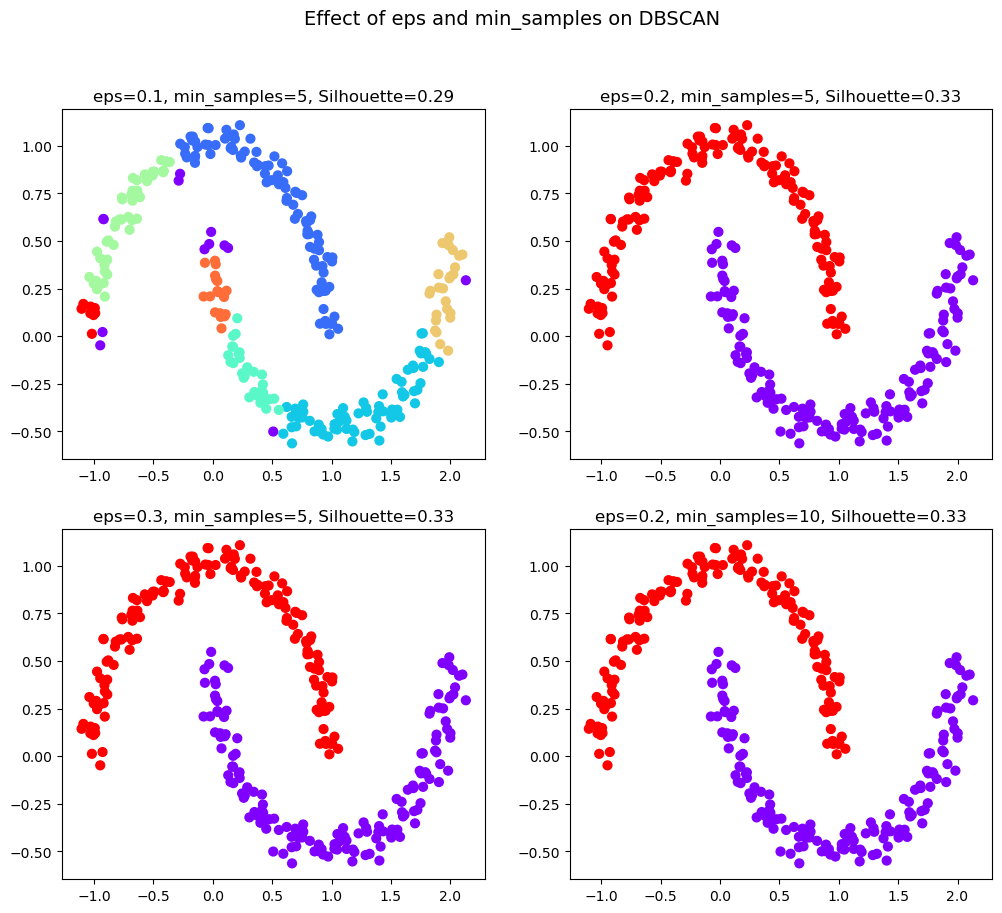

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons 
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Generate dataset
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

# Try different DBSCAN settings
settings = [
    {"eps": 0.1, "min_samples": 5},
    {"eps": 0.2, "min_samples": 5},
    {"eps": 0.3, "min_samples": 5},
    {"eps": 0.2, "min_samples": 10},
]

plt.figure(figsize=(12, 10))

for i, params in enumerate(settings, 1):
    dbscan = DBSCAN(eps=params["eps"], min_samples=params["min_samples"])
    labels = dbscan.fit_predict(X)
    
    # Compute silhouette score if at least 2 clusters exist
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters > 1:
        score = silhouette_score(X, labels)
        title = f"eps={params['eps']}, min_samples={params['min_samples']}, Silhouette={score:.2f}"
    else:
        title = f"eps={params['eps']}, min_samples={params['min_samples']}, Silhouette=N/A"
    
    plt.subplot(2, 2, i)
    plt.scatter(X[:,0], X[:,1], c=labels, cmap="rainbow", s=40)
    plt.title(title)

plt.suptitle("Effect of eps and min_samples on DBSCAN", fontsize=14)
plt.show()
